Модель системы «Хищник-Жертва»

In [181]:
import matplotlib.pyplot as plt # графики
import numpy as np # массивы
from scipy.integrate import odeint # ОДУ

In [182]:
a = 100 # коэффициент рождаемости жертв
b = 100 # коэффициент смертности хищников
c = 0.3 # коэффициент влияния численности хищников на численность жертв
d = 0.2 # коэффициент влияния численности жертв на численность хищников

N_0 = b/d # положение равновесия жертв
M_0 = a/c # положение равновесия хищников
print("Положение равновесия жертв = {0:.1f}".format(float(N_0)))
print("Положение равновесия хищников = {0:.1f}".format(float(M_0)))

Положение равновесия жертв = 500.0
Положение равновесия хищников = 333.3


In [198]:
# задаём правую часть системы ОДУ
def f(s, t, a, b, c, d):
    dNdt = (a - c*s[1])*s[0]  # s[0] = N (жертвы)
    dMdt = (-b + d*s[0])*s[1] # s[1] = M (хищники)
    return [dNdt, dMdt]

t = np.linspace(0, 1, 100) # массив значений от 0 до 10 (1000 точек)
n = np.sqrt(a * b)
m = np.sqrt(c * d)

s0 = [N_0, M_0] # начальные значения
sol1 = odeint(f, s0, t, args=(a,b,c,d)) 

s0 = [N_0 + n, M_0 + m] # начальные значения
sol2 = odeint(f, s0, t, args=(a,b,c,d)) 

s0 = [N_0 + 2*n, M_0 + 2*m] # начальные значения
sol3 = odeint(f, s0, t, args=(a,b,c,d)) 

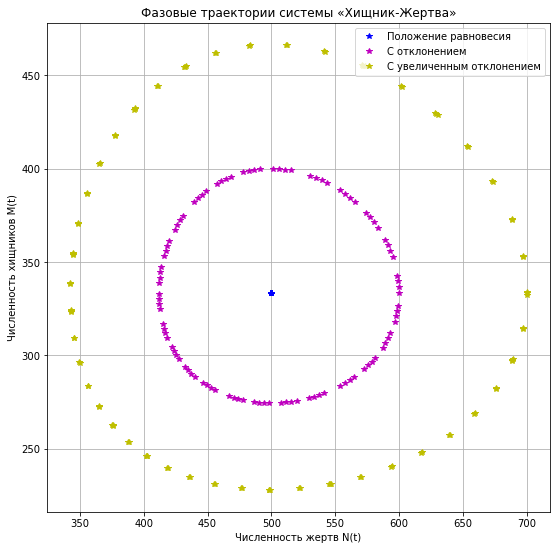

In [199]:
plt.figure(figsize=(9, 9))
plt.title("Фазовые траектории системы «Хищник-Жертва»") # заголовок
plt.xlabel("Численность жертв N(t)") # ось абсцисс
plt.ylabel("Численность хищников M(t)") # ось ординат
plt.grid() # включение отображение сетки
plt.plot(sol1[:, 0], sol1[:, 1], 'b*', label = "Положение равновесия")
plt.plot(sol2[:, 0], sol2[:, 1], 'm*', label = "С отклонением")
plt.plot(sol3[:, 0], sol3[:, 1], 'y*', label = "С увеличенным отклонением")
plt.legend()
plt.show()

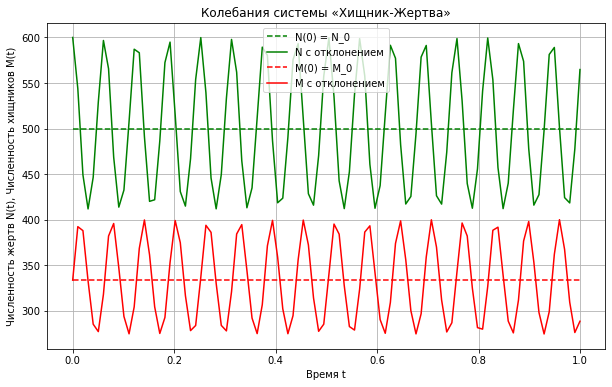

In [200]:
plt.figure(figsize=(10, 6))
plt.title("Колебания системы «Хищник-Жертва»") # заголовок
plt.xlabel("Время t") # ось абсцисс
plt.ylabel("Численность жертв N(t), Численность хищников M(t)") # ось ординат
plt.grid() # включение отображение сетки
plt.plot(t, sol1[:, 0], '--g', label = "N(0) = N_0")
plt.plot(t, sol2[:, 0], 'g', label = "N c отклонением")
plt.plot(t, sol1[:, 1], '--r', label = "M(0) = M_0")
plt.plot(t, sol2[:, 1], 'r', label = "M c отклонением")
plt.legend()
plt.show()